# Challenge Dataset

In [39]:
import pandas as pd
import os
import numpy as np
from sklearn.metrics import v_measure_score
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import random
import time

In [40]:
base_dir = 'C:/Users/fatih.temiz/PythonData/NetworkMeasurementNotebooks/MAC_derand_challenge-dataset/challenge-dataset'
df_list = list()

for root, dirs, files in os.walk(base_dir):
    for file in files:
        if file.endswith(".csv"):
            file_path = os.path.join(root,file)

        df = pd.read_csv(file_path)
        df_list.append(df)

combine = pd.concat(df_list, ignore_index=True)

combine['Timestamp']=pd.to_datetime(combine['Timestamp'], unit='s')

display(combine)

,Timestamp,MAC Address,Channel,DS Channel,HT Capabilities,Extended Capabilities,Vendor Specific Tags,SSID,Supported Rates,Extended Supported Rates,VHT Capabilities,HE Capabilities,Length,Label
0,2021-07-01 13:50:29.537939968,8e:80:39:0e:9a:0c,1,1,NaN,NaN,506f9a16030101,NaN,02040b16,0c1218243048606c,NaN,NaN,84,GooglePixel3A_V
1,2021-07-01 13:50:29.560427008,8e:80:39:0e:9a:0c,1,2,NaN,NaN,506f9a16030101,NaN,02040b16,0c1218243048606c,NaN,NaN,84,GooglePixel3A_V
2,2021-07-01 13:50:29.583031040,8e:80:39:0e:9a:0c,1,3,NaN,NaN,506f9a16030101,NaN,02040b16,0c1218243048606c,NaN,NaN,84,GooglePixel3A_V
3,2021-07-01 13:50:29.705140992,8e:80:39:0e:9a:0c,11,9,NaN,NaN,506f9a16030101,NaN,02040b16,0c1218243048606c,NaN,NaN,84,GooglePixel3A_V
4,2021-07-01 13:50:29.747716864,8e:80:39:0e:9a:0c,11,10,NaN,NaN,506f9a16030101,NaN,02040b16,0c1218243048606c,NaN,NaN,84,GooglePixel3A_V
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7498,2021-07-20 10:01:11.075258880,42:b1:98:56:e4:02,6,6,ad0113ffff000000000000000000000000000000000000...,00000a82004000000001,0050f208002700,NaN,02040b16,0c1218243048606c,92f99133faff6203faff6203,02000b,165,XiaomiRedmiNote9S_T
7499,2021-07-20 10:01:11.118583040,42:b1:98:56:e4:02,6,7,ad0113ffff000000000000000000000000000000000000...,00000a82004000000001,0050f208002700,NaN,02040b16,0c1218243048606c,92f99133faff6203faff6203,02000b,165,XiaomiRedmiNote9S_T
7500,2021-07-20 10:01:11.161272064,42:b1:98:56:e4:02,6,8,ad0113ffff000000000000000000000000000000000000...,00000a82004000000001,0050f208002700,NaN,02040b16,0c1218243048606c,92f99133faff6203faff6203,02000b,165,XiaomiRedmiNote9S_T
7501,2021-07-20 10:01:11.271422976,42:b1:98:56:e4:02,11,11,ad0113ffff000000000000000000000000000000000000...,00000a82004000000001,0050f208002700,NaN,02040b16,0c1218243048606c,92f99133faff6203faff6203,02001d,153,XiaomiRedmiNote9S_T


# Here threshold is updated from %60 to %50 to remove HE Capabilities column which yields worse results

In [41]:
combine_df = combine
nan_sum = combine_df.isna().sum()

nan_percentage = (nan_sum/len(combine_df))*100

print(nan_percentage)

col_drop = []

for i in range(0,len(nan_percentage)):
    if nan_percentage[i] > 50:
        col_drop.append(nan_percentage.index[i])

print(col_drop)

clean_df = combine_df.drop(col_drop, axis=1)

clean_df

Timestamp                    0.000000
MAC Address                  0.000000
Channel                      0.000000
DS Channel                   0.000000
HT Capabilities              3.558577
Extended Capabilities        3.558577
Vendor Specific Tags        29.814741
SSID                        94.695455
Supported Rates              0.000000
Extended Supported Rates     0.000000
VHT Capabilities            81.034253
HE Capabilities             51.219512
Length                       0.000000
Label                        0.000000
dtype: float64
['SSID', 'VHT Capabilities', 'HE Capabilities']


C:\Users\fatih.temiz\AppData\Local\Temp\ipykernel_4248\1792500683.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if nan_percentage[i] > 50:


,Timestamp,MAC Address,Channel,DS Channel,HT Capabilities,Extended Capabilities,Vendor Specific Tags,Supported Rates,Extended Supported Rates,Length,Label
0,2021-07-01 13:50:29.537939968,8e:80:39:0e:9a:0c,1,1,NaN,NaN,506f9a16030101,02040b16,0c1218243048606c,84,GooglePixel3A_V
1,2021-07-01 13:50:29.560427008,8e:80:39:0e:9a:0c,1,2,NaN,NaN,506f9a16030101,02040b16,0c1218243048606c,84,GooglePixel3A_V
2,2021-07-01 13:50:29.583031040,8e:80:39:0e:9a:0c,1,3,NaN,NaN,506f9a16030101,02040b16,0c1218243048606c,84,GooglePixel3A_V
3,2021-07-01 13:50:29.705140992,8e:80:39:0e:9a:0c,11,9,NaN,NaN,506f9a16030101,02040b16,0c1218243048606c,84,GooglePixel3A_V
4,2021-07-01 13:50:29.747716864,8e:80:39:0e:9a:0c,11,10,NaN,NaN,506f9a16030101,02040b16,0c1218243048606c,84,GooglePixel3A_V
...,...,...,...,...,...,...,...,...,...,...,...
7498,2021-07-20 10:01:11.075258880,42:b1:98:56:e4:02,6,6,ad0113ffff000000000000000000000000000000000000...,00000a82004000000001,0050f208002700,02040b16,0c1218243048606c,165,XiaomiRedmiNote9S_T
7499,2021-07-20 10:01:11.118583040,42:b1:98:56:e4:02,6,7,ad0113ffff000000000000000000000000000000000000...,00000a82004000000001,0050f208002700,02040b16,0c1218243048606c,165,XiaomiRedmiNote9S_T
7500,2021-07-20 10:01:11.161272064,42:b1:98:56:e4:02,6,8,ad0113ffff000000000000000000000000000000000000...,00000a82004000000001,0050f208002700,02040b16,0c1218243048606c,165,XiaomiRedmiNote9S_T
7501,2021-07-20 10:01:11.271422976,42:b1:98:56:e4:02,11,11,ad0113ffff000000000000000000000000000000000000...,00000a82004000000001,0050f208002700,02040b16,0c1218243048606c,153,XiaomiRedmiNote9S_T


In [42]:
unique_elem = clean_df.nunique()

print(unique_elem)

features = []

for i in range(0,len(unique_elem)-1):
    if unique_elem[i] < 25:
        features.append(unique_elem.index[i])

print(features)



Timestamp                   7502
MAC Address                 1509
Channel                        3
DS Channel                    13
HT Capabilities                5
Extended Capabilities          5
Vendor Specific Tags           7
Supported Rates                3
Extended Supported Rates       2
Length                        13
Label                          6
dtype: int64
['Channel', 'DS Channel', 'HT Capabilities', 'Extended Capabilities', 'Vendor Specific Tags', 'Supported Rates', 'Extended Supported Rates', 'Length']


C:\Users\fatih.temiz\AppData\Local\Temp\ipykernel_4248\2935877531.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if unique_elem[i] < 25:


In [43]:

def encoder(df,features):
    df_tmp = df.copy()
    for elem in features:
        if elem != 'Lenght' and elem != 'Channel' and elem != 'DS Channel':
            label_encoder = LabelEncoder()
            df_tmp[elem] = label_encoder.fit_transform(df_tmp[elem].astype(str))

    df_tmp[features]=df_tmp[features].astype(float)
    return df_tmp

encoded_df = encoder(clean_df,features)

burst_df = encoded_df.drop(['Timestamp'],axis=1)
#burst_df = burst_df.groupby(['MAC Address'])

#burst_df = burst_df.first().reset_index()

display(burst_df)

label_count = burst_df["Label"].value_counts()
print(label_count)




,MAC Address,Channel,DS Channel,HT Capabilities,Extended Capabilities,Vendor Specific Tags,Supported Rates,Extended Supported Rates,Length,Label
0,8e:80:39:0e:9a:0c,1.0,1.0,5.0,5.0,5.0,0.0,0.0,12.0,GooglePixel3A_V
1,8e:80:39:0e:9a:0c,1.0,2.0,5.0,5.0,5.0,0.0,0.0,12.0,GooglePixel3A_V
2,8e:80:39:0e:9a:0c,1.0,3.0,5.0,5.0,5.0,0.0,0.0,12.0,GooglePixel3A_V
3,8e:80:39:0e:9a:0c,11.0,9.0,5.0,5.0,5.0,0.0,0.0,12.0,GooglePixel3A_V
4,8e:80:39:0e:9a:0c,11.0,10.0,5.0,5.0,5.0,0.0,0.0,12.0,GooglePixel3A_V
...,...,...,...,...,...,...,...,...,...,...
7498,42:b1:98:56:e4:02,6.0,6.0,4.0,0.0,1.0,0.0,0.0,9.0,XiaomiRedmiNote9S_T
7499,42:b1:98:56:e4:02,6.0,7.0,4.0,0.0,1.0,0.0,0.0,9.0,XiaomiRedmiNote9S_T
7500,42:b1:98:56:e4:02,6.0,8.0,4.0,0.0,1.0,0.0,0.0,9.0,XiaomiRedmiNote9S_T
7501,42:b1:98:56:e4:02,11.0,11.0,4.0,0.0,1.0,0.0,0.0,5.0,XiaomiRedmiNote9S_T


Label
HuaweiHonor9_R         2394
iPhone12_W             2237
XiaomiRedmiNote9S_T    1423
SamsungS7_I             697
SamsungM31_A            485
GooglePixel3A_V         267
Name: count, dtype: int64


In [44]:
selected_features = ["HT Capabilities", "Extended Capabilities",
                     "Vendor Specific Tags","Supported Rates","Extended Supported Rates","Length","Channel",
                     "DS Channel"]
# "HE Capabilities" can be considered if NaN threshold reduced to %50

In [45]:
burst_df[selected_features]

,HT Capabilities,Extended Capabilities,Vendor Specific Tags,Supported Rates,Extended Supported Rates,Length,Channel,DS Channel
0,5.0,5.0,5.0,0.0,0.0,12.0,1.0,1.0
1,5.0,5.0,5.0,0.0,0.0,12.0,1.0,2.0
2,5.0,5.0,5.0,0.0,0.0,12.0,1.0,3.0
3,5.0,5.0,5.0,0.0,0.0,12.0,11.0,9.0
4,5.0,5.0,5.0,0.0,0.0,12.0,11.0,10.0
...,...,...,...,...,...,...,...,...
7498,4.0,0.0,1.0,0.0,0.0,9.0,6.0,6.0
7499,4.0,0.0,1.0,0.0,0.0,9.0,6.0,7.0
7500,4.0,0.0,1.0,0.0,0.0,9.0,6.0,8.0
7501,4.0,0.0,1.0,0.0,0.0,5.0,11.0,11.0


In [46]:
def online_clustering(df, selected_features, N):
    centroids = [df[selected_features].iloc[0].values]
    cluster_assignments = [0]  

    for i in range(1, len(df)):
        point = df[selected_features].iloc[i].values
        max_matches = 0
        best_centroid_idx = -1
        for idx, centroid in enumerate(centroids):
            matches = np.sum(centroid == point)
            if matches > max_matches:
                max_matches = matches
                best_centroid_idx = idx
        if max_matches >= N:
            cluster_assignments.append(best_centroid_idx)
        else:
            centroids.append(point)
            cluster_assignments.append(len(centroids) - 1)

    df['Cluster ID'] = cluster_assignments
    v_measure = v_measure_score(df['Label'], df['Cluster ID'])
    error = abs(len(set(cluster_assignments)) - len(df['Label'].unique()))
    return df, v_measure, error





In [47]:
def create_test_sets(df, K, num_sets):
    labels = df['Label'].unique()
    all_possible_combinations = list(itertools.combinations(labels, K))
    selected_combinations = random.sample(all_possible_combinations, min(num_sets, len(all_possible_combinations)))
    
    test_sets = []
    for combo in selected_combinations:
        test_set = df[df['Label'].isin(combo)]
        test_sets.append(test_set)
    
    return test_sets

def evaluate_clustering_on_test_sets(df, selected_features, N_values, K, num_sets):
    test_sets = create_test_sets(df, K, num_sets)
    performance_results = {N: [] for N in N_values}
    
    for N in N_values:
        for test_set in test_sets:
            _, v_measure, error = online_clustering(test_set.copy(), selected_features, N)
            performance_results[N].append((v_measure, error))
    
    # Calculate average v-measure and error for each N
    average_performance = {N: (np.mean([result[0] for result in results]), np.mean([result[1] for result in results])) 
                           for N, results in performance_results.items()}
    
    individual_performance = {N: {'v_measure': [result[0] for result in results], 'error': [result[1] for result in results]}
                              for N, results in performance_results.items()}
    
    
    return average_performance,individual_performance



def evaluate_different_K_and_N(df, selected_features, N_values):
    overall_results = {}
    total_combinations = sum([5, 5, 5, 5, 1]) * len(N_values)
    processed_combinations = 0
    
    for K, num_sets in zip(range(2, 7), [5, 5, 5, 5, 1]):
        overall_results[K] = {}
        for N in N_values:
            start_time = time.time()  # Start timer
            print(f"Evaluating for K={K}, N={N}...")
            average_performance, individual_performance = evaluate_clustering_on_test_sets(df, selected_features, [N], K, num_sets)
            overall_results[K][N] = {'average': average_performance, 'individual': individual_performance}
            
            end_time = time.time()  # End timer
            processed_combinations += num_sets
            print(f"K={K}, N={N} completed in {end_time - start_time:.2f} seconds")
            print(f"Completed {processed_combinations} of {total_combinations} combinations")
    
    return overall_results

N_values = range(4,5) # Best N obtained from previous step

results = evaluate_different_K_and_N(burst_df, selected_features, N_values)




Evaluating for K=2, N=4...
K=2, N=4 completed in 3.01 seconds
Completed 5 of 21 combinations
Evaluating for K=3, N=4...
K=3, N=4 completed in 5.88 seconds
Completed 10 of 21 combinations
Evaluating for K=4, N=4...
K=4, N=4 completed in 9.61 seconds
Completed 15 of 21 combinations
Evaluating for K=5, N=4...
K=5, N=4 completed in 12.67 seconds
Completed 20 of 21 combinations
Evaluating for K=6, N=4...
K=6, N=4 completed in 3.12 seconds
Completed 21 of 21 combinations


In [48]:
for K, performance_dict in results.items():
    for N, performance_stats in performance_dict.items():
        # Retrieve the average and individual performances
        average_stats = performance_stats['average'][N]
        individual_stats = performance_stats['individual'][N]

        average_v_measure, average_error = average_stats
        individual_v_measures = individual_stats['v_measure']
        individual_errors = individual_stats['error']

        # Print average metrics specifically for N=4
        if N == 4:
            print(f"K={K}, N={N}: Average V-Measure: {average_v_measure}, Average Error: {average_error}")
            print("Below is the list for individual scores for K different test sets")
        # Optionally, print individual performance metrics as well
        count=1
        for v_measure, error in zip(individual_v_measures, individual_errors):
            
            
            
            print(f"K={K}, N={N}: Individual V-Measure-{count}: {v_measure}, Individual Error: {error}")
            count+=1
    print("\n")

K=2, N=4: Average V-Measure: 0.997852823679269, Average Error: 0.0
Below is the list for individual scores for K different test sets
K=2, N=4: Individual V-Measure-1: 1.0, Individual Error: 0
K=2, N=4: Individual V-Measure-2: 0.9892641183963445, Individual Error: 0
K=2, N=4: Individual V-Measure-3: 1.0, Individual Error: 0
K=2, N=4: Individual V-Measure-4: 1.0, Individual Error: 0
K=2, N=4: Individual V-Measure-5: 1.0, Individual Error: 0


K=3, N=4: Average V-Measure: 0.9970933174923282, Average Error: 0.0
Below is the list for individual scores for K different test sets
K=3, N=4: Individual V-Measure-1: 1.0000000000000002, Individual Error: 0
K=3, N=4: Individual V-Measure-2: 0.9949570362261279, Individual Error: 0
K=3, N=4: Individual V-Measure-3: 1.0, Individual Error: 0
K=3, N=4: Individual V-Measure-4: 0.9960662476769259, Individual Error: 0
K=3, N=4: Individual V-Measure-5: 0.9944433035585867, Individual Error: 0


K=4, N=4: Average V-Measure: 0.9952458220779435, Average Error: 

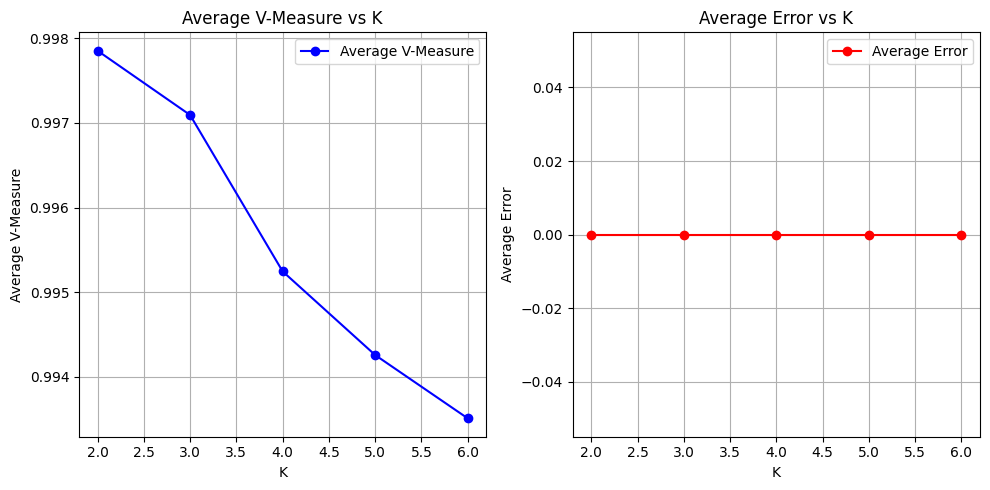

In [49]:
def plot_average_performance(results):
    # Prepare the data for plotting
    k_values = []
    average_v_measures = []
    average_errors = []
    
    for K, performance_dict in results.items():
        k_values.append(K)
        # Assuming N_values is a list and we take the first element since we are looking for average over all N for a given K
        N = list(performance_dict.keys())[0]
        average_v_measure, average_error = performance_dict[N]['average'][N]
        average_v_measures.append(average_v_measure)
        average_errors.append(average_error)

    # Plotting the average V-Measure
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(k_values, average_v_measures, marker='o', color='b', label='Average V-Measure')
    plt.title('Average V-Measure vs K')
    plt.xlabel('K')
    plt.ylabel('Average V-Measure')
    plt.grid(True)
    plt.legend()

    # Plotting the average error
    plt.subplot(1, 2, 2)
    plt.plot(k_values, average_errors, marker='o', color='r', label='Average Error')
    plt.title('Average Error vs K')
    plt.xlabel('K')
    plt.ylabel('Average Error')
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_average_performance(results)


Results:Best N from the previous study was N=4 (number of features to match clusters) and it is used in this study. When create test datasets from different devices selecting randomly. Validating our approach is quite straightforward. v_measure gives results above %99.4 with 0 error. Preprocessing part modified slightly to remove HE Capabilities column which has almost %50 NaN values. MAC addressses not utilized at all assuming they are all random. From the graphs, it can be deducted that comparing more devices(increasing K) yield less accurate clusters but they are still above acceptable threshold